## Vanilla Decision Tree & Random Forest

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test

In [2]:
X_train = X_train.drop(columns=['Latitude', 'Longitude', 'ViolationDescription', 'ViolationCode', 'Camis', 'Dba',
                               'Zipcode', 'InspectionDate', 'InspectionYear'])
X_test = X_test.drop(columns=['Latitude', 'Longitude', 'ViolationDescription', 'ViolationCode', 'Camis', 'Dba', 
                             'Zipcode', 'InspectionDate', 'InspectionYear'])

We'll be working with 7 features:

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117697 entries, 126620 to 248657
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Boro             117697 non-null  object 
 1   Cuisine          117697 non-null  object 
 2   Action           117697 non-null  object 
 3   Grade            117697 non-null  object 
 4   InspectionType   117697 non-null  object 
 5   CouncilDistrict  117697 non-null  float64
 6   IsChain          117697 non-null  bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 6.4+ MB


In [4]:
# Instantiate Encoders
le = LabelEncoder()
ohe = OneHotEncoder()

In [5]:
# Label encoding
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [6]:
# One hot encoding
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Boro_Brooklyn,Boro_Manhattan,Boro_Bronx,Boro_Queens,Boro_Staten Island,Cuisine_Mediterranean,Cuisine_American,Cuisine_Latin/Caribbean,Cuisine_Asian,Cuisine_Specialty,...,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Non-operational),CouncilDistrict,IsChain
126620,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,33.0,False
14307,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,2.0,False
286220,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,33.0,False
374436,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,12.0,False
47465,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,41.0,False


In [7]:
X_test_ohe = ohe.fit_transform(X_test)
X_test_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Boro_Brooklyn,Boro_Bronx,Boro_Manhattan,Boro_Queens,Boro_Staten Island,Cuisine_Pizza,Cuisine_American,Cuisine_Italian,Cuisine_International,Cuisine_Latin/Caribbean,...,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Non-operational),CouncilDistrict,IsChain
234299,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,38.0,True
309886,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,13.0,True
256582,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,35.0,False
66275,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,35.0,False
121712,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,2.0,False


* ### Vanilla Decision Tree

Let's build a vanilla decision tree to see how it could be different than the one we obtained using SelectKBest Tool in the previous notebook.

In [8]:
# Instantiate and fit a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=10) 
tree.fit(X_train_ohe, y_train_le)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [9]:
# Test set prediction
tree_pred = tree.predict(X_test_ohe)

In [10]:
# Classification report
print(classification_report(y_test_le, tree_pred))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54     38685
           1       0.56      0.59      0.58     39780

    accuracy                           0.56     78465
   macro avg       0.56      0.56      0.56     78465
weighted avg       0.56      0.56      0.56     78465



In [11]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test_le, tree_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 55.73%


### Confusion Matrix

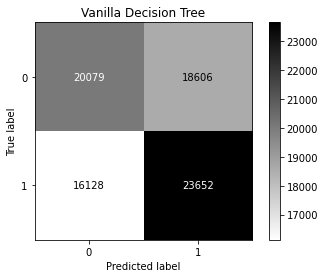

In [12]:
plot_confusion_matrix(tree, X_test_ohe, y_test_le, cmap=plt.cm.binary, values_format='d')
plt.title('Vanilla Decision Tree')
plt.show()

* Vanilla Decision Tree: 'TP': 23652, 'TN': 20079, 'FP': 18606, 'FN': 16128

## Random Forest

In [13]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, max_depth=3, random_state=21)
forest.fit(X_train_ohe, y_train_le)

RandomForestClassifier(max_depth=3, n_estimators=25, random_state=21)

In [14]:
# Training accuracy score
print("Training Accuracy for Random Forest: {:.4}%".format(forest.score(X_train_ohe, y_train_le) * 100))

# Test accuracy score
print("Test Accuracy for Random Forest: {:.4}%".format(forest.score(X_test_ohe, y_test_le) * 100))

Training Accuracy for Random Forest: 55.89%
Test Accuracy for Random Forest: 55.39%


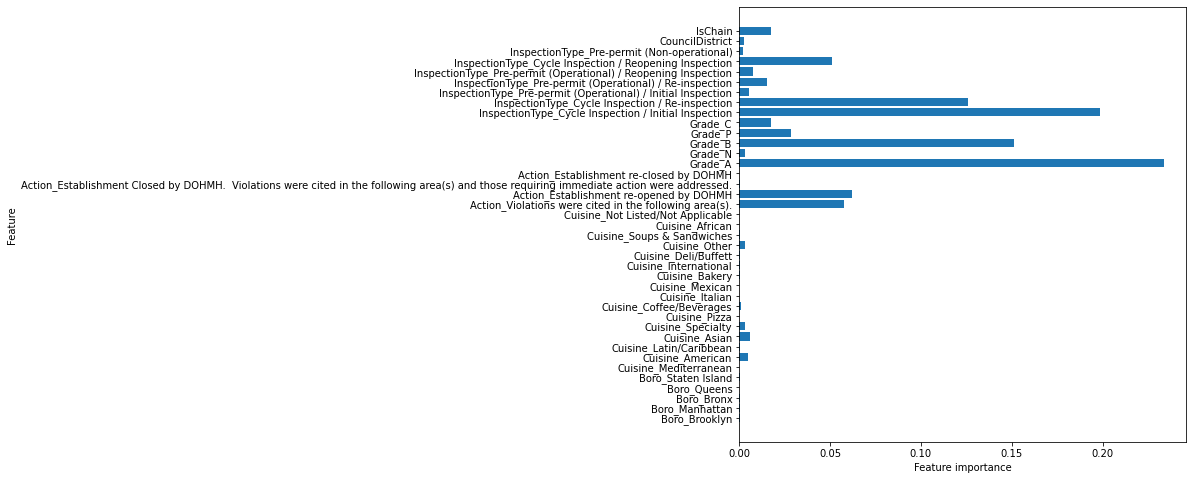

In [15]:
def plot_feature_importances(model):
    n_features = X_train_ohe.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_ohe.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [16]:
forest_pred = forest.predict(X_test_ohe)

In [17]:
# Classification report
print(classification_report(y_test_le, forest_pred))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54     38685
           1       0.56      0.58      0.57     39780

    accuracy                           0.55     78465
   macro avg       0.55      0.55      0.55     78465
weighted avg       0.55      0.55      0.55     78465



### Confusion Matrix

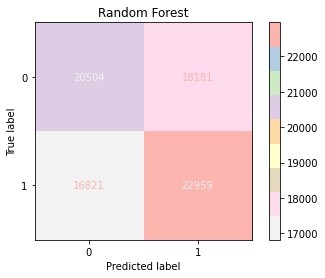

In [18]:
plot_confusion_matrix(forest, X_test_ohe, y_test_le, cmap=plt.cm.Pastel1_r, values_format='d')
plt.title('Random Forest')
plt.show()

* Random Forest: 'TP': 22959, 'TN': 20504, 'FP': 18181, 'FN': 16821.
* I tried many different combinations of n_estimators (number of trees) and max_depth (number of levels per tree) keeping track with the use of random_state.
* The best random forest was returned using 25 trees with 3 levels each.

Let's compare our confusion matrix values:

* Logistic Reg: 'TP': 22138, 'TN': 20617, 'FP': 18068, 'FN': 17642
* SelectKBest Tree : 'TP': 23246, 'TN': 20415, 'FP': 18270, 'FN': 16534
* Vanilla Tree: 'TP': 23652, 'TN': 20079, 'FP': 18606, 'FN': 16128
* Random Forest: 'TP': 22959, 'TN': 20504, 'FP': 18181, 'FN': 16821

### Conclusions
* In real life, it is very unlikely for an eatery to have no violations at all during service. It is virtually impossible. 
* The important thing is to differentiate which of these violations could cause eaters to get sick (Critical Flags).
* For our problem, we want to keep False Negatives as low as possible, since we never want to predict a True Critical Flag as Non-Critical.
* All 4 models returned a similar accuracy at aroun 56%. 
* Our best model was a Vanilla Decision Tree based on how many violations were predicted as False Negatives. (20.55%). 

### Future Work

* Tuning the model to reduce the number of False Negatives as much as possible.